### Lab 10
## The SVD and Image Compression

In [1]:
import numpy as np
from scipy import linalg as la

### Exercise 1.

In [2]:
import cmath

def truncated_svd(A, k=None):
    '''
    if k=None, calculate the compact SVD
    else truncate the n-k smallest singular values
    '''
    
    AHA = A.conj().T @ A
    eigs, vecs = la.eig(AHA)
    sings = np.sqrt(eigs)
    
    if k is None:
        select = sings != 0
        k = select.sum()
    else:
        sings = sings[sings != 0]
        select = np.argsort(sings)[:k]
    
    sings = sings[select]
    vecs = vecs[select]
    
    Sigma = np.diag(sings)
    V = vecs[:,:k]
    U = 1 / sings * (A[:k,:k] @ V)
    
    
    return Sigma, V.conj().T, U, k

In [3]:
A = np.random.random([5, 10])
Sigma, VH , U, r = truncated_svd(A)
np.allclose(U @ Sigma @ VH, A)

True

### Exercise 2.

In [4]:
from matplotlib import pyplot as plt

(2, 50)


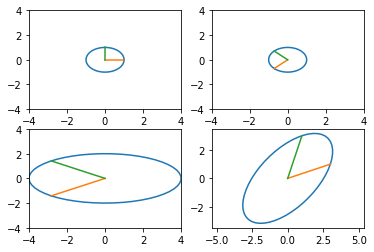

In [5]:
A = np.array([[3, 1],[1, 3]])
U, S, VH = la.svd(A)
Sigma = np.diag(S)
theta = np.linspace(0, 2*np.pi)

e1y = np.zeros(20)
e1x = np.linspace(0,1,num=20)
E1 = np.vstack([e1x, e1y])

e2y = np.linspace(0, 1, num=20)
e2x = np.zeros(20)
E2 = np.vstack([e2x, e2y])

x = np.cos(theta)
y = np.sin(theta)
S=np.vstack((x, y))

VS = VH @ S
EV1 = VH @ E1
EV2 = VH @ E2

SigVS = Sigma @ VH @ S
ES1 = Sigma @ VH @ E1
ES2 = Sigma @ VH @ E2

print(SigVS.shape)

UVS = U @ Sigma @ VH @ S
EU1 = U @ Sigma @ VH @ E1
EU2 = U @ Sigma @ VH @ E2

fig, axes = plt.subplots(2,2)

axes[0,0].plot(x, y)
axes[0,0].plot(E1[0,:], E1[1,:])
axes[0,0].plot(E2[0,:], E2[1,:])
axes[0,0].set_ylim(-4,4)
axes[0,0].set_xlim(-4,4)

axes[0,1].plot(VS[0,:], VS[1,:])
axes[0,1].plot(EV1[0,:], EV1[1,:])
axes[0,1].plot(EV2[0,:], EV2[1,:])
axes[0,1].set_ylim(-4,4)
axes[0,1].set_xlim(-4,4)

axes[1,0].plot(SigVS[0,:], SigVS[1,:])
axes[1,0].plot(ES1[0,:], ES1[1,:])
axes[1,0].plot(ES2[0,:], ES2[1,:])
axes[1,0].set_ylim(-4,4)
axes[1,0].set_xlim(-4,4)

axes[1,1].plot(UVS[0,:], UVS[1,:])
axes[1,1].plot(EU1[0,:], EU1[1,:])
axes[1,1].plot(EU2[0,:], EU2[1,:])
axes[1,1].set_ylim(-4,4)
axes[1,1].set_xlim(-4,4)


plt.axis('equal')
plt.show()


### Exercise 3.

In [6]:
def svd_approx(A, k):
    U, s, Vh = la.svd(A, full_matrices=False)
    S = np.diag(s[:k])
    Ahat = U[:,:k].dot(S).dot(Vh[:k,:])
    
    return Ahat

In [7]:
A = np.array([[1,1,3,4], [5,4,3,7], [9,10,10,12], [13,14,15,16], [17,18,19,20]])
Ahat = svd_approx(A, 4)
Ahat

array([[  1.,   1.,   3.,   4.],
       [  5.,   4.,   3.,   7.],
       [  9.,  10.,  10.,  12.],
       [ 13.,  14.,  15.,  16.],
       [ 17.,  18.,  19.,  20.]])

### Exercise 4.

In [8]:
def llr_approx(A, tol=1e-2):
    U,s,Vh = la.svd(A, full_matrices=False)
    dev = s > tol
    ll = dev.sum() - 1 
    S = np.diag(s[:ll])
    Ahat = U[:,:ll].dot(S).dot(Vh[:ll,:])
    return ll, Ahat

In [9]:
rr, A_ll = llr_approx(A)
rr

3

### Exercise 5.

In [10]:
import matplotlib.pyplot as plt

In [11]:
def compress_img(filename, k):
    X = plt.imread(filename).astype(float)
    m, n, layers = X.shape
    
    R = X[:,:,0]
    G = X[:,:,1]
    B = X[:,:,2]
    
    X_hat = np.ones_like(X)
    for lay in range(layers):
        approx = svd_approx(X[:,:,lay], k)
        approx[approx < 0] = 0
        approx[approx > 255] = 255
        a_max = approx.max()
        approx = approx / a_max
        X_hat[:,:,lay] = approx
        
        X[:,:,lay] = X[:,:,lay] / X[:,:,lay].max()
    fig, axes = plt.subplots(1,2)
    axes[0].imshow(X)
    axes[1].imshow(X_hat)
    plt.show();

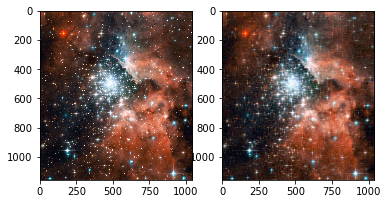

In [12]:
compress_img(filename='hubble.jpg', k=45)